Load the simulated data

In [ ]:
reload("GynC")
using GynC

file = "broken.sim"
sim = []

if isfile(file)
    sim=GynC.load(file, all=true)
else
    sim = mcmc(ModelConfig(Lausanne(1)),100)
    GynC.save(file, sim);
end
;

dump the model config (sampling 100 samples with relative proposition std of relprop=0.1)

In [18]:
ModelConfig(GynC.Lausanne(1)) |> dump

GynC.ModelConfig 
  data: Array(Float64,(4,31)) 4x31 Array{Float64,2}:
 NaN  NaN  NaN  NaN    3.37  NaN  …  NaN     3.91  NaN    2.16  NaN  NaN
 NaN  NaN  NaN  NaN    3.9   NaN     NaN     1.58  NaN    1.56  NaN  NaN
 NaN  NaN  NaN  NaN  146.6   NaN     NaN  1142.0   NaN  231.0   NaN  NaN
 NaN  NaN  NaN  NaN    1.12  NaN     NaN    11.3   NaN    1.9   NaN  NaN
  sigma_rho: Float64 0.1
  sigma_y0: Int64 1
  parms_bound: Array(Float64,(82,)) [36549.5,36549.5,961.0,11.855,0.0238,0.952,0.0015,25.0,10.715,374.255  …  661200.0,862.25,0.995,80.0,15.0,5.0,1100.0,0.027965,1100.0,48.0]


Plot the simulated solutions for samples 18 (green), 19 (red), 20 (cyan) and the measured datapoints
Note: 
first 18 samples remain stationary => too big initial steps
this can also be seen from the abrupt jump in the solution

  0.938652 seconds (15.10 k allocations: 998.816 KB)
  0.842884 seconds (8.62 k allocations: 673.563 KB)
  0.937676 seconds (8.62 k allocations: 673.563 KB)
  

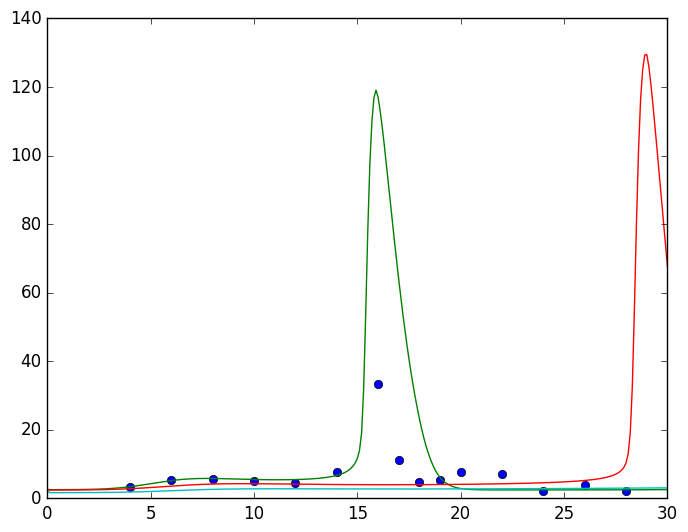

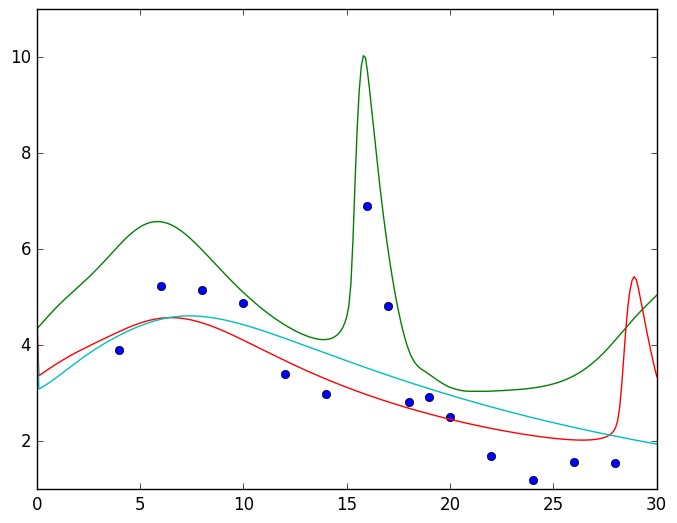

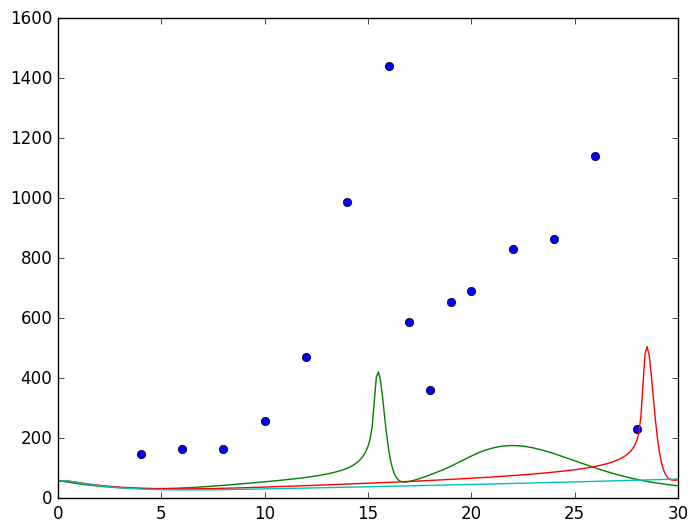

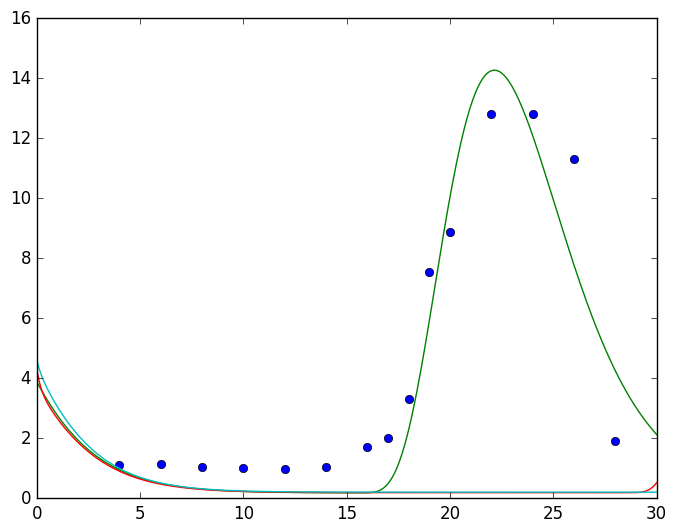

0.908666 seconds (8.62 k allocations: 673.563 KB)


In [11]:
for s = 1:4 @time GynC.plot_residuum(sim[18:1:20,:,:], s) end

Show the values of the 3 samples, the last column denotes the loglikelihood

In [12]:
sim[18:20,:,:]

Object of type "Mamba.ModelChains"

Iterations = 18:20
Thinning interval = 1
Chains = 1
Samples per chain = 3

3x116x1 Array{Float64,3}:
[:, :, 1] =
 7309.9   7309.9   192.2    2.371    …  3.3169e-5   2.9879e-5   -3436.08
 7023.35  7974.51  206.845  2.5739      3.48701e-5  2.76884e-5  -2060.16
 6241.35  6883.32  209.691  2.57925     3.84802e-5  2.7829e-5   -1478.84

show the respective share in loglikelihood of each component

In [13]:
map(18:20) do i
    map(1:4) do s
        data = fill(NaN, 4, 31)
        data[s,:] = sim.model[:data].value[s,:]
        GynC.llh(data, GynC.allparms(sim[i:i,:parms,:].value|>vec), sim[i:i,:y0,:].value|>vec, 0.1)
    end
end

3-element Array{Array{Float64,1},1}:
 [-2219.72,-415.581,-505.887,-294.892]
 [-889.825,-81.196,-544.387,-544.756] 
 [-220.543,-122.373,-602.943,-532.984]